<a href="https://colab.research.google.com/github/tsions1/DS1002/blob/main/Copy_of_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name: Eden Mulugeta, Tsion Sahle    Computing ID: unb6ny, cnp8jw

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [ ]:
import pandas as pd

link = "https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv"

df = pd.read_csv(link, delimiter = ';' )
print (df.head())

                   timeOpen                 timeClose  \
0  2022-12-31T00:00:00.000Z  2022-12-31T23:59:59.999Z   
1  2022-12-30T00:00:00.000Z  2022-12-30T23:59:59.999Z   
2  2022-12-29T00:00:00.000Z  2022-12-29T23:59:59.999Z   
3  2022-12-28T00:00:00.000Z  2022-12-28T23:59:59.999Z   
4  2022-12-27T00:00:00.000Z  2022-12-27T23:59:59.999Z   

                   timeHigh                   timeLow      open      high  \
0  2022-12-31T15:23:00.000Z  2022-12-31T00:21:00.000Z  0.838968  0.853502   
1  2022-12-30T04:22:00.000Z  2022-12-30T15:12:00.000Z  0.860193  0.864752   
2  2022-12-29T00:49:00.000Z  2022-12-29T21:03:00.000Z  0.885723  0.887118   
3  2022-12-28T00:20:00.000Z  2022-12-28T10:44:00.000Z  0.921162  0.925702   
4  2022-12-27T14:19:00.000Z  2022-12-27T19:12:00.000Z  0.931138  0.955402   

        low     close      volume     marketCap                 timestamp  
0  0.835226  0.842688  3001502.06  2.771561e+08  2022-12-31T23:59:59.999Z  
1  0.826643  0.839048  3608615.07  2.75958

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [ ]:
number_of_rows, number_of_columns = df.shape
print("Number of rows:", number_of_rows)
print("Number of columns:", number_of_columns)

Number of rows: 741
Number of columns: 11


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [ ]:

df.isnull().sum()
"Number of duplicate rows:", df.duplicated().sum()

df['date']= pd.to_datetime(df['timestamp'])
df.sort_values(by='date', inplace=True)

drop_columns = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
cleaned_df = df.drop(columns=drop_columns)

Now display the first 10 rows of the cleaned dataset.

In [ ]:
print (cleaned_df.head(10))

         open       high       low     close        volume  \
740  6.201133   7.007523  6.171834  6.923968  3.104665e+07   
739  6.201133   7.007523  6.171834  6.923968  3.104665e+07   
738  6.948680   7.632146  6.358218  7.514079  4.052611e+07   
737  7.528216   8.714947  7.081120  8.664688  4.947928e+07   
736  8.671285   9.390797  8.425946  9.390797  3.140463e+07   
735  9.386493  10.004872  9.215244  9.562131  4.630334e+07   
734  9.569239   9.726429  8.452265  9.380988  4.228627e+07   
733  9.370450   9.636120  8.728044  9.570511  2.849895e+07   
732  9.571917   9.944797  8.657147  9.308809  3.101239e+07   
731  9.298315   9.298315  7.126050  8.610997  1.013024e+08   

                    timestamp                             date  
740  2021-01-03T23:59:59.999Z 2021-01-03 23:59:59.999000+00:00  
739  2021-01-03T23:59:59.999Z 2021-01-03 23:59:59.999000+00:00  
738  2021-01-04T23:59:59.999Z 2021-01-04 23:59:59.999000+00:00  
737  2021-01-05T23:59:59.999Z 2021-01-05 23:59:59.999000+

## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [ ]:
cleaned_df ['close_change'] = cleaned_df ['close'].diff()
print (cleaned_df.head())

         open      high       low     close       volume  \
740  6.201133  7.007523  6.171834  6.923968  31046652.87   
739  6.201133  7.007523  6.171834  6.923968  31046652.87   
738  6.948680  7.632146  6.358218  7.514079  40526109.15   
737  7.528216  8.714947  7.081120  8.664688  49479278.39   
736  8.671285  9.390797  8.425946  9.390797  31404627.93   

                    timestamp                             date  close_change  
740  2021-01-03T23:59:59.999Z 2021-01-03 23:59:59.999000+00:00           NaN  
739  2021-01-03T23:59:59.999Z 2021-01-03 23:59:59.999000+00:00      0.000000  
738  2021-01-04T23:59:59.999Z 2021-01-04 23:59:59.999000+00:00      0.590111  
737  2021-01-05T23:59:59.999Z 2021-01-05 23:59:59.999000+00:00      1.150608  
736  2021-01-06T23:59:59.999Z 2021-01-06 23:59:59.999000+00:00      0.726110  


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
top_10_days_growth = cleaned_df [cleaned_df['close_change']>0].nlargest(10, 'close_change')

print(top_10_days_growth[['date', 'close_change']])

                                date  close_change
492 2021-09-01 23:59:59.999000+00:00     16.677156
487 2021-09-06 23:59:59.999000+00:00      9.800320
692 2021-02-19 23:59:59.999000+00:00      8.335900
592 2021-05-24 23:59:59.999000+00:00      6.333923
674 2021-03-09 23:59:59.999000+00:00      5.529699
515 2021-08-09 23:59:59.999000+00:00      5.325192
485 2021-09-08 23:59:59.999000+00:00      5.239728
625 2021-04-26 23:59:59.999000+00:00      4.504385
611 2021-05-05 23:59:59.999000+00:00      4.488174
311 2022-02-28 23:59:59.999000+00:00      4.401841


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [ ]:
cleaned_df ['rate_of_change'] = (cleaned_df['close_change'] / cleaned_df['close'].shift(1)) * 100

print(cleaned_df.head())

         open      high       low     close       volume  \
740  6.201133  7.007523  6.171834  6.923968  31046652.87   
739  6.201133  7.007523  6.171834  6.923968  31046652.87   
738  6.948680  7.632146  6.358218  7.514079  40526109.15   
737  7.528216  8.714947  7.081120  8.664688  49479278.39   
736  8.671285  9.390797  8.425946  9.390797  31404627.93   

                    timestamp                             date  close_change  \
740  2021-01-03T23:59:59.999Z 2021-01-03 23:59:59.999000+00:00           NaN   
739  2021-01-03T23:59:59.999Z 2021-01-03 23:59:59.999000+00:00      0.000000   
738  2021-01-04T23:59:59.999Z 2021-01-04 23:59:59.999000+00:00      0.590111   
737  2021-01-05T23:59:59.999Z 2021-01-05 23:59:59.999000+00:00      1.150608   
736  2021-01-06T23:59:59.999Z 2021-01-06 23:59:59.999000+00:00      0.726110   

     rate_of_change  
740             NaN  
739        0.000000  
738        8.522727  
737       15.312701  
736        8.380101  


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
top_5_pos_change = cleaned_df.nlargest (5, 'rate_of_change')

top_5_neg_change = cleaned_df.nsmallest(5, 'rate_of_change')

print("The top five days of greatest positive change:")
print(top_5_pos_change[['date', 'rate_of_change']])

print("The top five days of greatest negative chnage:")
print(top_5_neg_change[['date', 'rate_of_change']])

The top five days of greatest positive change:
                                date  rate_of_change
53  2022-11-10 23:59:59.999000+00:00       52.868637
492 2021-09-01 23:59:59.999000+00:00       34.382542
692 2021-02-19 23:59:59.999000+00:00       31.766452
24  2022-12-09 23:59:59.999000+00:00       24.684838
48  2022-11-15 23:59:59.999000+00:00       24.488632
The top five days of greatest negative chnage:
                                date  rate_of_change
55  2022-11-08 23:59:59.999000+00:00      -75.075175
54  2022-11-09 23:59:59.999000+00:00      -58.313683
50  2022-11-13 23:59:59.999000+00:00      -28.705850
597 2021-05-19 23:59:59.999000+00:00      -27.510072
52  2022-11-11 23:59:59.999000+00:00      -26.344388


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

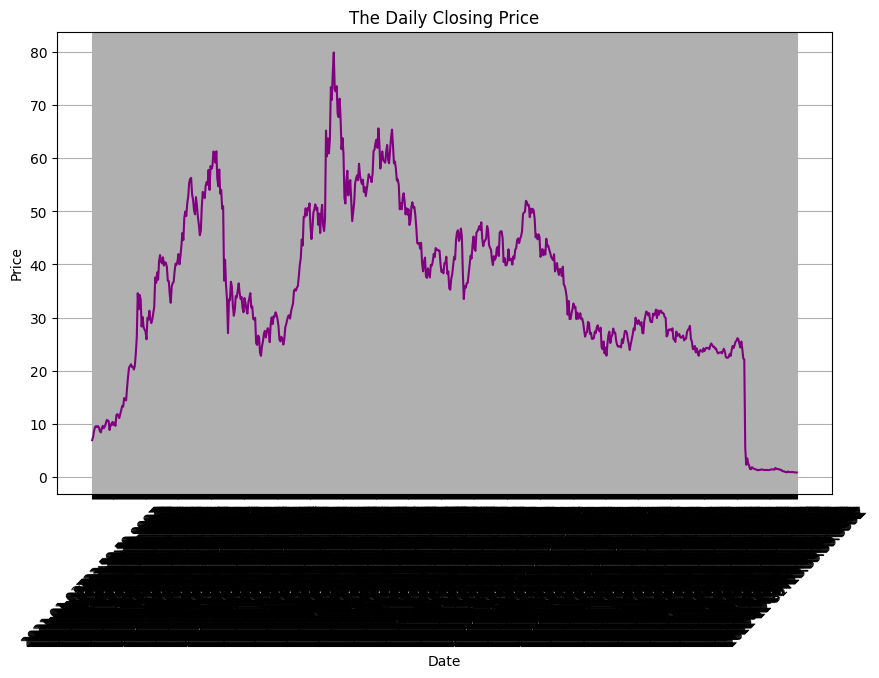

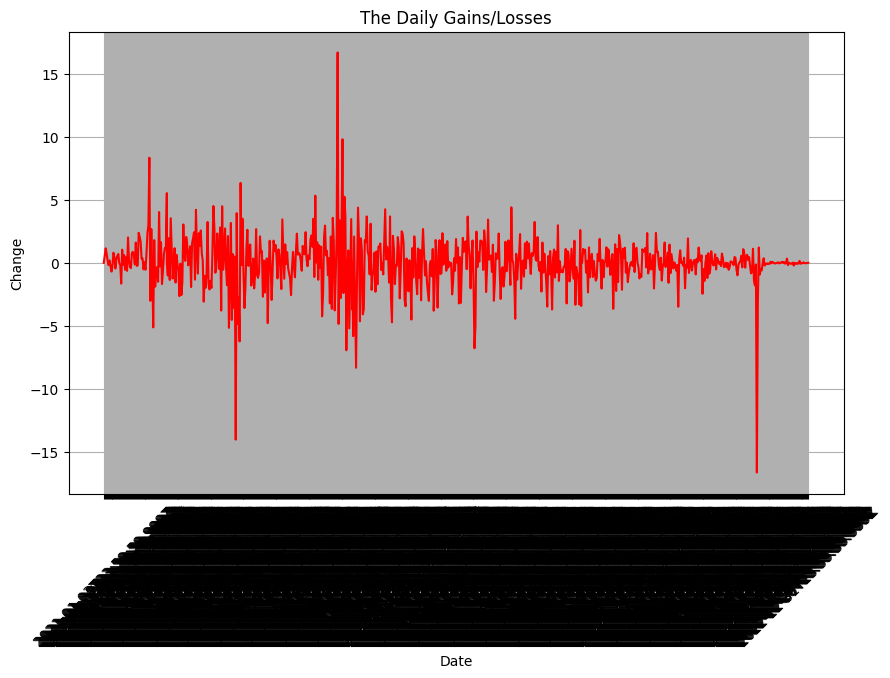

In [ ]:
import matplotlib.pyplot as plt
df['close_change'] = df['close'].diff()

plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['close'], color='purple')
plt.title('The Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['close_change'], color='red')
plt.title('The Daily Gains/Losses')
plt.xlabel('Date')
plt.ylabel('Change')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

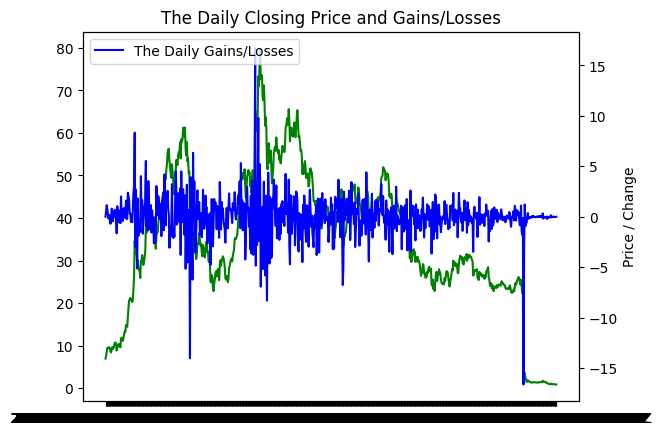

In [ ]:
plt.plot(df['timestamp'], df['close'], color='green', label='The Daily Closing Price')

# Create a secondary Y-axis for daily gains/losses
plt.twinx()
plt.plot(df['timestamp'], df['close_change'], color='blue', label='The Daily Gains/Losses')

# Set labels and legend
plt.xlabel('Date')
plt.ylabel('Price / Change')
plt.title('The Daily Closing Price and Gains/Losses')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.show()